# Модуль А. Анализ и предобработка данных

## Импортирование библиотек

In [16]:
# для работы с датафреймами
import pandas as pd

# для визуализации результатов
import matplotlib.pyplot as plt

# для работы с массивами
import numpy as np

# для работы с файловой системой
import os, shutil

# модуль со словарями
from collections import defaultdict

# для создания прогресс-бара
from tqdm import tqdm

# nlp библиотека
import nltk
# модуль со стоп словами
from nltk.corpus import stopwords

# для создания облаков слов
from wordcloud import WordCloud

# модуль с регулярными приложениями
import re

# для работы со строками
import string


In [2]:
# Применяем стиль dark_background
plt.style.use('dark_background')

In [3]:
# Скачиваем стоп-слова для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alzot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# добавление стоп-слов
stop_words.update({"в","и","а","к","с","по","на","для","это","с"})

### Функции

In [5]:
# процедура для генерации облака слов
def generate_wordcoud(text: str, color: str = 'black'):
    '''Процедура для создания облака слов'''
    # создаем объект - облако слов
    wordcloud = WordCloud(
        width=800,              # ширина
        height=400,             # высота
        background_color=color  # цвет фона
    ).generate(text)
    
    # визуализация облака слова
    plt.figure(figsize=(10,5))                          # размер фигуры
    plt.imshow(wordcloud, interpolation='bilinear')     # загружаем объект для вывода
    plt.axis('off')                                     # отключаем сетку
    plt.show()                                          # вывод изображения

In [6]:
# функция для чистки стоп слов
def clean_text(text: str, stop_words: set):
    '''
    Функция для чистки текста от стоп слов
        Args:
            - test (str): текст, который нужно почистить от стоп слов
            - stop_words (set): множество стоп слов
        Returns:
            - отфильтрованный текст (str)
    '''
    # создаем список слов используя split()
    words = text.split()
    # фильтруем слова используя заданное множество
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # возвращаем почищенный текст
    return ' '.join(filtered_words)

In [7]:
# функция для построения графиков
def see_distribution(data_stats: dict, 
                     title: str = 'Values distribution',
                     xlabel: str = 'Keys',
                     ylabel: str = 'Values',
                     color: str = 'lightblue',
                     graph_type: str = 'bar',
                     grid: bool = True,
                     meta: bool = True
                     ):
    '''
    Процедура для построения графика распределения данных
        Args:
        - data_stats (dict): словарь с собранной статистикой
        - title (str): название графика
        - xlabel (str): название икса
        - ylabel (str): название игрика
        - color (str): цвет графика
        - grid (bool): включение сетки
        - meta (bool): включение метаинформации
    '''
    # парсим входной словарь
    x, y = data_stats.keys(), data_stats.values()
    
    plt.figure(figsize=(10,5))      # размер фигуры
    # в зависимости от типа графика, строим нужный
    match graph_type:
        # если тип графика - bar
        case 'bar':
            plt.bar(x, y, color=color)      # тип графика
        # если тип графика - plot   
        case 'plot':
            plt.plot(x, y, color=color)     # тип графика
        # если тип графика - plot   
        case 'scatter':
            plt.scatter(x, y, color=color)     # тип графика


    # настраиваем график
    plt.title(title)                # название графика
    plt.xlabel(xlabel)              # подпись к иксу
    plt.ylabel(ylabel)              # подпись к игрику

    # если включена сетка
    if grid:
        # включаем сетку
        plt.grid(True)

    plt.show()                      # вывод графика

    # если включен вывод метаинформации
    if meta:
        # всего значений
        print(f'Counts: {len(x)}')
        # вывод минимального значения
        print(f'Min: {min(y)}')
        # вывод среднего значения
        print(f'Mean: {sum(y)/len(y):.2f}')
        # вывод максмиального значения
        print(f'Max: {max(y)}')

## Анализ и предобработка даных

Создам датафрейм, куда помещу пути ко всем файлам

In [8]:
# путь к основной папке с данными
data_dir = '../Data/DATASET/'
# логирование
print(os.path.exists(data_dir))
print(len(os.listdir(data_dir)))

True
1002


In [9]:
# проверяем, есть ли файл с датафреймом
if not os.path.exists('database.csv'):
    # если нет, то создаем
    df = pd.DataFrame(columns=['filename', 'annotation', 'tags', 'text'])

    # индексатор для работы со строками датафрейма
    ind = 0
    # проходимся по каждой папке в основной папке с данными
    for folder in os.listdir(data_dir):
        # получаем путь к папке
        folder_path = os.path.join(data_dir, folder)
        # получаем список данных в папке
        folder_data = os.listdir(folder_path)
        # получаем строку датафрейма
        df.loc[ind] = [
            folder,
            os.path.join(folder_path, folder_data[0]),     # путь к файлу с аннотацией текста
            os.path.join(folder_path, folder_data[1]),     # путь к файлу с тэгами текста
            os.path.join(folder_path, folder_data[2])      # путь к файлу с текстом
        ]
        # делаем шаг на индексаторе
        ind+=1

    # выводим размер получившегося датафрейма
    print(df.shape)
    # сохраняем датафрейм в формате cscv
    df.to_csv('database.csv')
# читаем полученный датафрейм
df = pd.read_csv('database.csv')
# выводим первые 5 строк 
df.head()

,Unnamed: 0,filename,annotation,tags,text
0,0,1,../Data/DATASET/1\annotation.txt,../Data/DATASET/1\tags.txt,../Data/DATASET/1\text.txt
1,1,10,../Data/DATASET/10\annotation.txt,../Data/DATASET/10\tags.txt,../Data/DATASET/10\text.txt
2,2,100,../Data/DATASET/100\annotation.txt,../Data/DATASET/100\tags.txt,../Data/DATASET/100\text.txt
3,3,1000,../Data/DATASET/1000\annotation.txt,../Data/DATASET/1000\tags.txt,../Data/DATASET/1000\text.txt
4,4,1001,../Data/DATASET/1001\annotation.txt,../Data/DATASET/1001\tags.txt,../Data/DATASET/1001\text.txt


фильтруем по заспамленности

In [17]:
# список со словами текста
wordlist = []
# словарь для статистики слов
word_stats = defaultdict(int)
# проходимся по каждой строке датафрейма
for i in range(df.shape[0]):
    # получаем путь к файлу к тексту
    text_path = df.loc[i]['text']
    # читаем файл к тексту
    with open(text_path, 'r', encoding='utf-8') as file:
        # читаем текст
        text = clean_text(file.read(), stop_words)
        # проходимся по каждому слову
        for word in text.split():
            # обрабатываем слово
            word = re.sub(r'[{}]'.format(string.punctuation), '', word.lower())
            # добавляем слово в статистику
            word_stats[word] +=1
            # добавляем слово в список
            wordlist.append(word)


    full_word = ''
    # wordlist = list(set(wordlist))
    for word in wordlist:
        full_word+=f' {word}'

    break


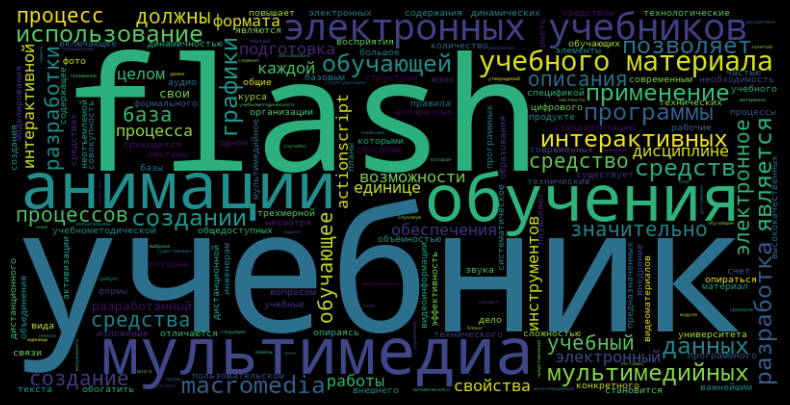

In [18]:
generate_wordcoud(full_word)

Проверим распределение длины текстов и разметок (annotation)

In [19]:
# словарь для статистики длины текстов
text_stats = defaultdict(int)
# словарь для статистики длины текстов без спец символов
text_spec_stats = defaultdict(int)
# проходимся по каждой строке датафрейма
for i in range(df.shape[0]):
    # получаем путь к файлу к тексту
    text_path = df.loc[i]['text']
    # читаем файл к тексту
    with open(text_path, 'r', encoding='utf-8') as file:
        # получаем текст
        text = file.read()
        # обновляем словарь с спец символами
        text_stats[i] = len(text)
        # обновляем словарь без спец символов
        text_spec_stats[i] = len(re.sub(r'[{}]'.format(string.punctuation), '',text))

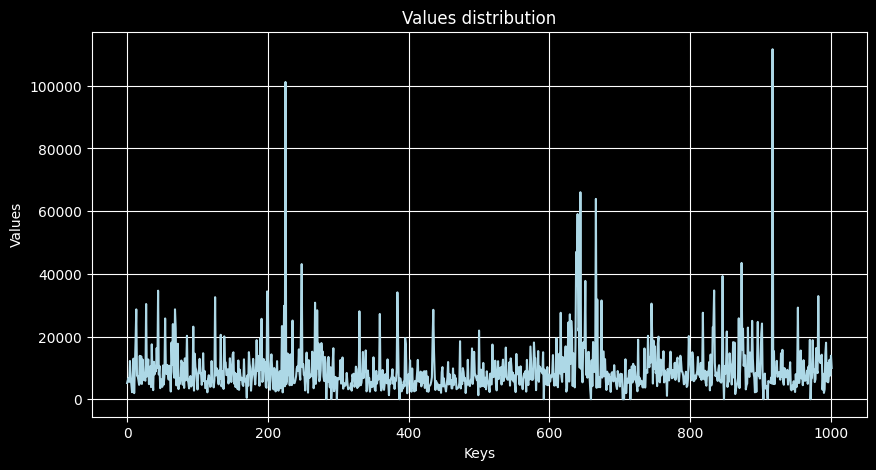

Counts: 1002
Min: 0
Mean: 9244.45
Max: 111644


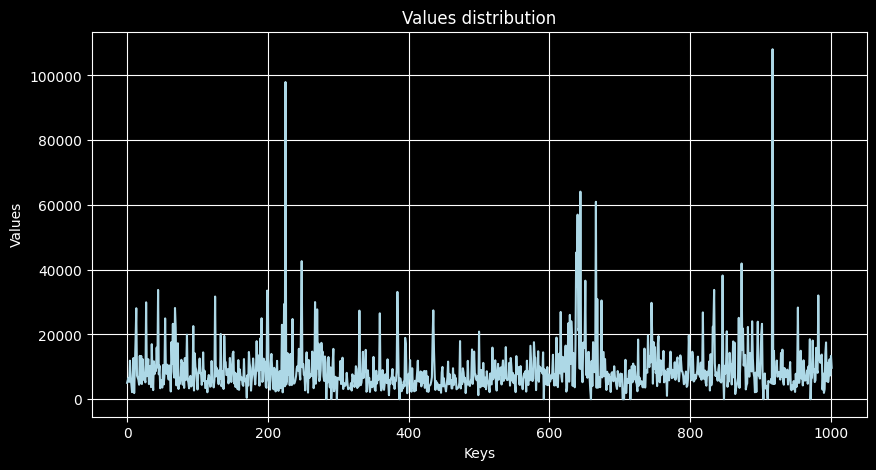

Counts: 1002
Min: 0
Mean: 8970.66
Max: 108116


In [20]:
# график для статистики со спец символами
see_distribution(text_stats, graph_type='plot', grid=True)
# # график для статистики без спец символов
see_distribution(text_spec_stats, graph_type='plot', grid=True)

Попробуем нормализовать наши графики

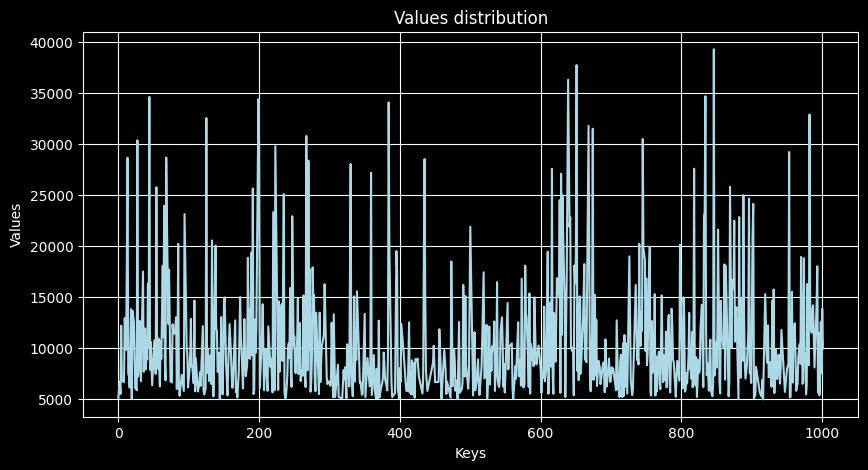

Counts: 748
Min: 5007
Mean: 10515.11
Max: 39291


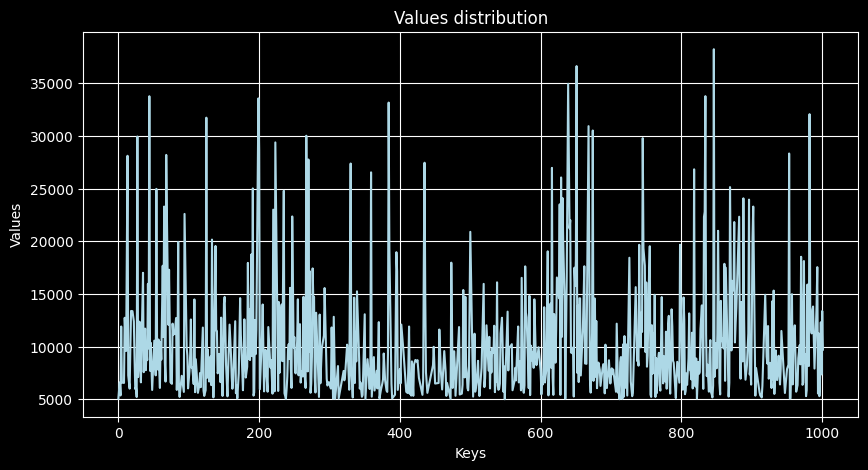

Counts: 732
Min: 5003
Mean: 10321.56
Max: 38218


In [21]:
# график для статистики со спец символами
see_distribution({k: v for k, v in text_stats.items() if 5000 < v < 40000}, graph_type='plot')
# # график для статистики без спец символов
see_distribution({k: v for k, v in text_spec_stats.items() if 5000 < v < 40000}, graph_type='plot')

In [22]:
# словарь для статистики длины аннотаиций
annot_stats = defaultdict(int)
# словарь для статистики длины аннотаций без спец символов
annot_spec_stats = defaultdict(int)
# проходимся по каждой строке датафрейма
for i in range(df.shape[0]):
    # получаем путь к файлу к аннотации
    text_path = df.loc[i]['annotation']
    # читаем файл к аннотации
    with open(text_path, 'r', encoding='utf-8') as file:
        # получаем аннотацию
        annot = file.read()
        # обновляем словарь с спец символами
        annot_stats[i] = len(annot)
        # обновляем словарь без спец символов
        annot_spec_stats[i] = len(re.sub(r'[{}]'.format(string.punctuation), '',annot))

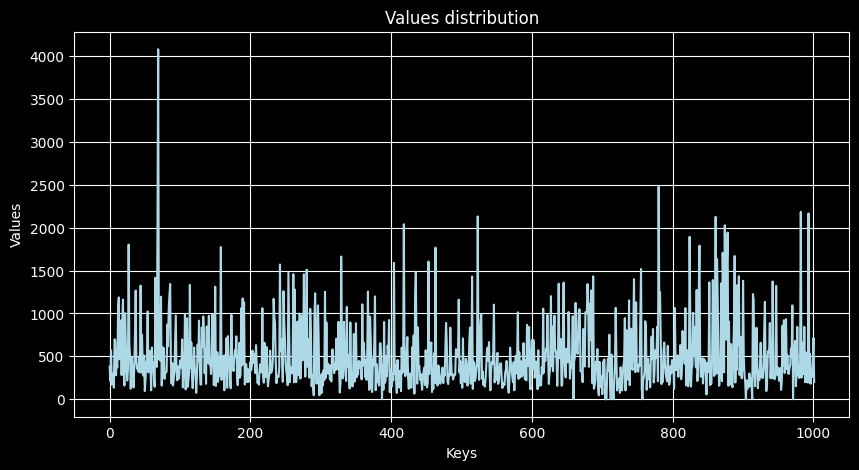

Counts: 1002
Min: 0
Mean: 495.30
Max: 4082


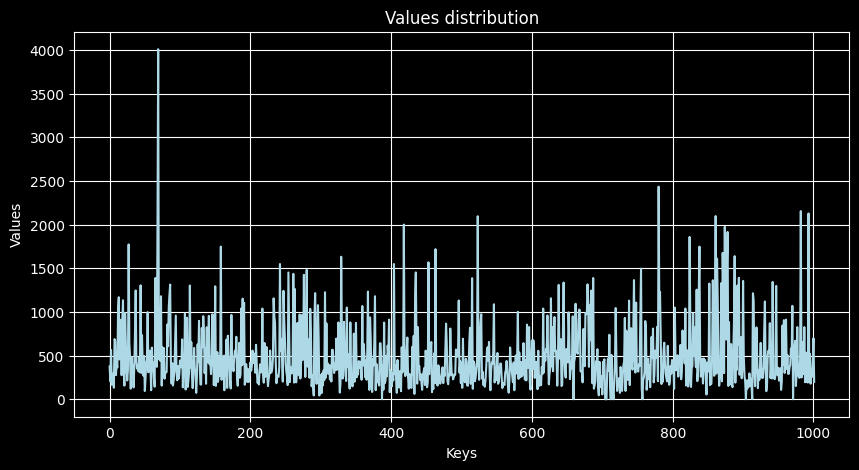

Counts: 1002
Min: 0
Mean: 485.56
Max: 4007


In [23]:
# график для статистики со спец символами
see_distribution(annot_stats, graph_type='plot', grid=True)
# # график для статистики без спец символов
see_distribution(annot_spec_stats, graph_type='plot', grid=True)

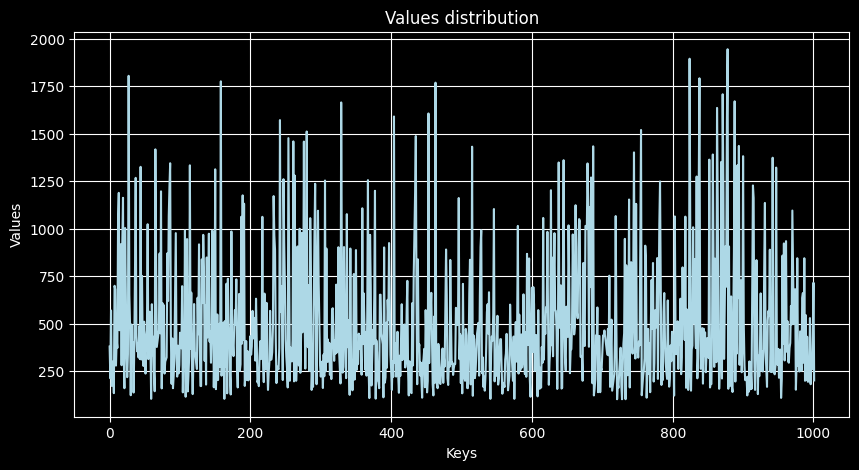

Counts: 963
Min: 102
Mean: 491.81
Max: 1944


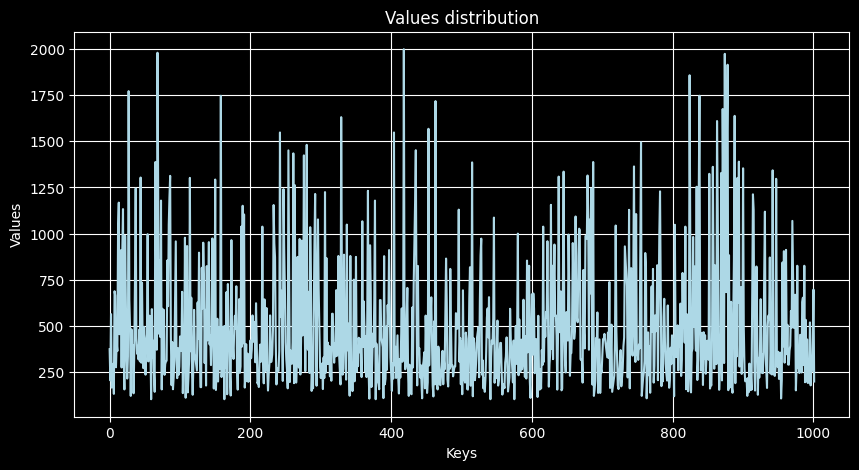

Counts: 963
Min: 103
Mean: 488.05
Max: 1999


In [24]:
# график для статистики со спец символами
see_distribution({k: v for k, v in annot_stats.items() if 100 < v < 2000}, graph_type='plot')
# # график для статистики без спец символов
see_distribution({k: v for k, v in annot_spec_stats.items() if 100 < v < 2000}, graph_type='plot')